# Linear Regression

## Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Importing the data

In [2]:
data_frame=pd.read_excel("C:\\Users\\user\\Desktop\\Student's performance in exam 2.new.xlsx")

In [3]:
data_frame

,Gender,Student ID,Time spent on social media/ hour,Time spent on lessons/ hour,GPA,SAT,Part-time job,University,Specialty,IQ,Health problem,English level,Attendance,Exam quality
0,female,190238004,5.0,4.0,90.60,314.0,No,Baku Engineering University,Yes,95,No,A2,Yes,hard
1,female,190210001,7.0,7.0,84.50,379.7,No,Baku Engineering University,Yes,85,No,A2,No,hard
2,female,180409012,12.0,12.0,NaN,259.0,No,Baku Engineering University,No,90,No,B1,No,hard
3,male,190800030,6.0,2.0,80.00,325.0,No,Baku Engineering University,Yes,81,No,A2,Yes,normal
4,female,190407015,3.0,7.0,98.50,637.5,No,Baku Engineering University,Yes,90,No,B1,Yes,hard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,female,180003946,2.0,1.5,92.27,456.0,No,Baku Engineering University,Yes,107,No,B2,Yes,normal
158,female,180300591,7.0,10.0,72.00,337.0,Yes,Baku Engineering University,Yes,78,No,A1,No,hard
159,female,190703332,7.5,2.0,74.73,512.0,Yes,Baku Engineering University,Yes,89,Yes,A2,Yes,hard
160,female,180703300,4.0,3.0,83.87,501.0,No,Baku Engineering University,Yes,91,No,B1,Yes,normal


### Information about data

In [6]:
# I have prepared the data based on the survey

In [7]:
# Gender - "female" and "male"
# stundent ID - Each student has personal ID number
# Time spent on social media/hour - Time spent on social network during the day
# Time spent on lessons/hour - Time spent on lessons during the day
# GPA - Grade Point Average
# SAT - Gotten score to get in university
# Part-time job - Whether students work part-time job or not
# University - University where students study
# Specialty - Whether students like their specialties or not
# IQ
# Health problem - Whether students have a psychological problem, any ilness or not
# English level - "A1-beginner","A2-elementary","B1-pre-intermediate","B2-intermediate","C1-upper-intermediate"
# Attendance - Whether students attend the lesson or not
# Exam quality - Quality of exam. Easy, normal or hard

In [8]:
df=data_frame.copy()

In [9]:
df.head()

,Gender,Student ID,Time spent on social media/ hour,Time spent on lessons/ hour,GPA,SAT,Part-time job,University,Specialty,IQ,Health problem,English level,Attendance,Exam quality
0,female,190238004,5.0,4.0,90.6,314.0,No,Baku Engineering University,Yes,95,No,A2,Yes,hard
1,female,190210001,7.0,7.0,84.5,379.7,No,Baku Engineering University,Yes,85,No,A2,No,hard
2,female,180409012,12.0,12.0,NaN,259.0,No,Baku Engineering University,No,90,No,B1,No,hard
3,male,190800030,6.0,2.0,80.0,325.0,No,Baku Engineering University,Yes,81,No,A2,Yes,normal
4,female,190407015,3.0,7.0,98.5,637.5,No,Baku Engineering University,Yes,90,No,B1,Yes,hard


In [10]:
df.columns

Index(['Gender', 'Student ID', ' Time spent on social media/ hour',
       'Time spent on lessons/ hour', 'GPA', 'SAT', 'Part-time job',
       'University', 'Specialty', 'IQ', 'Health problem', 'English level',
       'Attendance', 'Exam quality'],
      dtype='object')

In [11]:
df.columns=['gender','student_ID','time_socialmedia','time_lessons','GPA','SAT','parttime_job','university',
            'specialty','IQ','health_problem','eng_level','attendance','exam_quality']

In [12]:
df

,gender,student_ID,time_socialmedia,time_lessons,GPA,SAT,parttime_job,university,specialty,IQ,health_problem,eng_level,attendance,exam_quality
0,female,190238004,5.0,4.0,90.60,314.0,No,Baku Engineering University,Yes,95,No,A2,Yes,hard
1,female,190210001,7.0,7.0,84.50,379.7,No,Baku Engineering University,Yes,85,No,A2,No,hard
2,female,180409012,12.0,12.0,NaN,259.0,No,Baku Engineering University,No,90,No,B1,No,hard
3,male,190800030,6.0,2.0,80.00,325.0,No,Baku Engineering University,Yes,81,No,A2,Yes,normal
4,female,190407015,3.0,7.0,98.50,637.5,No,Baku Engineering University,Yes,90,No,B1,Yes,hard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,female,180003946,2.0,1.5,92.27,456.0,No,Baku Engineering University,Yes,107,No,B2,Yes,normal
158,female,180300591,7.0,10.0,72.00,337.0,Yes,Baku Engineering University,Yes,78,No,A1,No,hard
159,female,190703332,7.5,2.0,74.73,512.0,Yes,Baku Engineering University,Yes,89,Yes,A2,Yes,hard
160,female,180703300,4.0,3.0,83.87,501.0,No,Baku Engineering University,Yes,91,No,B1,Yes,normal


## Preprocessing

### Looking through the descriptive statistics of the variables

In [13]:
# Let's view the mean, frequency, standard deviation of values, min and max values in columns
df.describe(include='all')

,gender,student_ID,time_socialmedia,time_lessons,GPA,SAT,parttime_job,university,specialty,IQ,health_problem,eng_level,attendance,exam_quality
count,162,1.620000e+02,161.000000,158.000000,161.000000,162.000000,162,162,162,162.000000,162,162,162,162
unique,2,NaN,NaN,NaN,NaN,NaN,2,1,2,NaN,2,5,2,3
top,female,NaN,NaN,NaN,NaN,NaN,No,Baku Engineering University,Yes,NaN,No,B1,Yes,hard
freq,117,NaN,NaN,NaN,NaN,NaN,107,162,139,NaN,135,62,123,66
mean,NaN,1.797232e+08,4.181988,3.970253,85.784348,471.938272,NaN,NaN,NaN,92.111111,NaN,NaN,NaN,NaN
std,NaN,1.235525e+07,2.516890,2.850215,7.794291,124.319510,NaN,NaN,NaN,7.744363,NaN,NaN,NaN,NaN
min,NaN,1.500060e+08,1.000000,0.250000,47.000000,76.000000,NaN,NaN,NaN,77.000000,NaN,NaN,NaN,NaN
25%,NaN,1.802025e+08,2.000000,2.000000,80.000000,379.700000,NaN,NaN,NaN,88.000000,NaN,NaN,NaN,NaN
50%,NaN,1.805700e+08,3.500000,3.000000,87.000000,494.250000,NaN,NaN,NaN,91.000000,NaN,NaN,NaN,NaN
75%,NaN,1.901795e+08,6.000000,5.000000,91.730000,581.500000,NaN,NaN,NaN,96.000000,NaN,NaN,NaN,NaN


In [14]:
# If we remove "University" column, there will be no change in the our model. Because there is only one categoric value
# in that column. So, this column doesn't effect our regression
# At the same time, "Student ID" should be removed. Because, each student has personal ID number and that's why 
# it doesn't effect our model too

In [15]:
df_=df.drop(['university','student_ID'],axis=1)

In [16]:
df_

,gender,time_socialmedia,time_lessons,GPA,SAT,parttime_job,specialty,IQ,health_problem,eng_level,attendance,exam_quality
0,female,5.0,4.0,90.60,314.0,No,Yes,95,No,A2,Yes,hard
1,female,7.0,7.0,84.50,379.7,No,Yes,85,No,A2,No,hard
2,female,12.0,12.0,NaN,259.0,No,No,90,No,B1,No,hard
3,male,6.0,2.0,80.00,325.0,No,Yes,81,No,A2,Yes,normal
4,female,3.0,7.0,98.50,637.5,No,Yes,90,No,B1,Yes,hard
...,...,...,...,...,...,...,...,...,...,...,...,...
157,female,2.0,1.5,92.27,456.0,No,Yes,107,No,B2,Yes,normal
158,female,7.0,10.0,72.00,337.0,Yes,Yes,78,No,A1,No,hard
159,female,7.5,2.0,74.73,512.0,Yes,Yes,89,Yes,A2,Yes,hard
160,female,4.0,3.0,83.87,501.0,No,Yes,91,No,B1,Yes,normal


In [17]:
df_.describe(include='all')

,gender,time_socialmedia,time_lessons,GPA,SAT,parttime_job,specialty,IQ,health_problem,eng_level,attendance,exam_quality
count,162,161.000000,158.000000,161.000000,162.000000,162,162,162.000000,162,162,162,162
unique,2,NaN,NaN,NaN,NaN,2,2,NaN,2,5,2,3
top,female,NaN,NaN,NaN,NaN,No,Yes,NaN,No,B1,Yes,hard
freq,117,NaN,NaN,NaN,NaN,107,139,NaN,135,62,123,66
mean,NaN,4.181988,3.970253,85.784348,471.938272,NaN,NaN,92.111111,NaN,NaN,NaN,NaN
std,NaN,2.516890,2.850215,7.794291,124.319510,NaN,NaN,7.744363,NaN,NaN,NaN,NaN
min,NaN,1.000000,0.250000,47.000000,76.000000,NaN,NaN,77.000000,NaN,NaN,NaN,NaN
25%,NaN,2.000000,2.000000,80.000000,379.700000,NaN,NaN,88.000000,NaN,NaN,NaN,NaN
50%,NaN,3.500000,3.000000,87.000000,494.250000,NaN,NaN,91.000000,NaN,NaN,NaN,NaN
75%,NaN,6.000000,5.000000,91.730000,581.500000,NaN,NaN,96.000000,NaN,NaN,NaN,NaN


In [18]:
# As we see, max count in columns is 162 and min count is 158. This means that, there are missing values (null values) in data

### Dealing with missing values

In [19]:
df_.isnull().sum()

gender              0
time_socialmedia    1
time_lessons        4
GPA                 1
SAT                 0
parttime_job        0
specialty           0
IQ                  0
health_problem      0
eng_level           0
attendance          0
exam_quality        0
dtype: int64

In [20]:
# According to output above, there are 6 missing values and they cover approximately 3.7% of the total data
# If missing values cover less than or equal to 5% of total data, we can remove all them

In [21]:
df_no_mv=df_.dropna(axis=0)

In [22]:
df_no_mv.isnull().sum()

gender              0
time_socialmedia    0
time_lessons        0
GPA                 0
SAT                 0
parttime_job        0
specialty           0
IQ                  0
health_problem      0
eng_level           0
attendance          0
exam_quality        0
dtype: int64

In [23]:
df_no_mv.describe(include='all')

,gender,time_socialmedia,time_lessons,GPA,SAT,parttime_job,specialty,IQ,health_problem,eng_level,attendance,exam_quality
count,157,157.000000,157.000000,157.000000,157.000000,157,157,157.000000,157,157,157,157
unique,2,NaN,NaN,NaN,NaN,2,2,NaN,2,5,2,3
top,female,NaN,NaN,NaN,NaN,No,Yes,NaN,No,B1,Yes,hard
freq,112,NaN,NaN,NaN,NaN,103,135,NaN,133,58,123,63
mean,NaN,4.119745,3.919108,85.734076,475.184713,NaN,NaN,92.286624,NaN,NaN,NaN,NaN
std,NaN,2.419722,2.785652,7.771917,124.274615,NaN,NaN,7.725292,NaN,NaN,NaN,NaN
min,NaN,1.000000,0.250000,47.000000,76.000000,NaN,NaN,77.000000,NaN,NaN,NaN,NaN
25%,NaN,2.000000,2.000000,80.000000,381.000000,NaN,NaN,88.000000,NaN,NaN,NaN,NaN
50%,NaN,3.500000,3.000000,87.000000,499.000000,NaN,NaN,91.000000,NaN,NaN,NaN,NaN
75%,NaN,5.000000,5.000000,91.500000,585.000000,NaN,NaN,96.000000,NaN,NaN,NaN,NaN


In [24]:
# Now the number of rows is the same in all columns

### Graphs

In [25]:
# let's view the graphs of columns that have numeric values to see the outliers

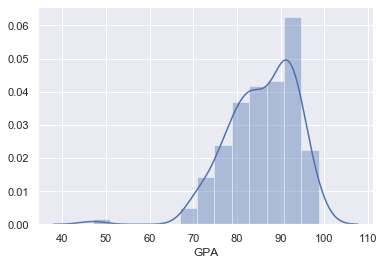

In [26]:
sns.distplot(df_no_mv['GPA'])

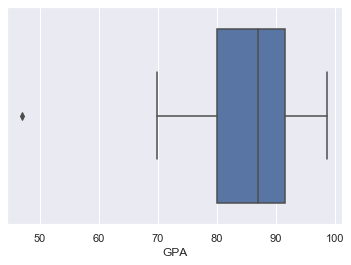

In [27]:
sns.boxplot(df_no_mv['GPA'])

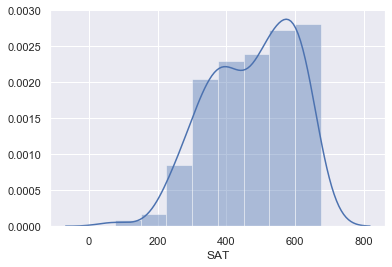

In [28]:
sns.distplot(df_no_mv['SAT'])

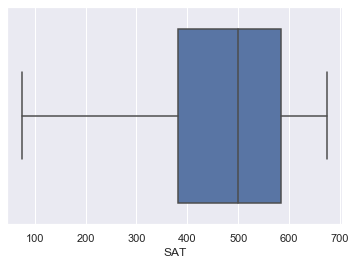

In [29]:
sns.boxplot(df_no_mv['SAT'])

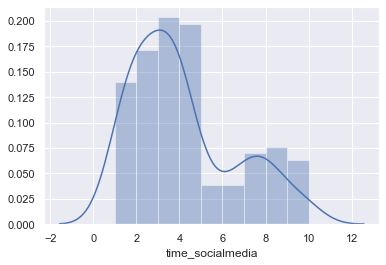

In [30]:
sns.distplot(df_no_mv['time_socialmedia'])

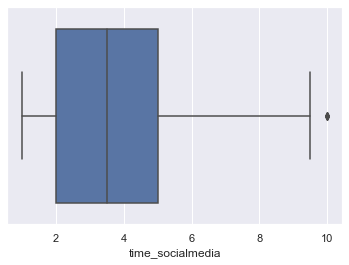

In [31]:
sns.boxplot(df_no_mv['time_socialmedia'])

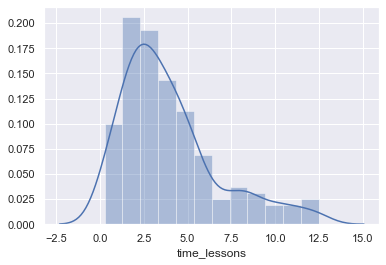

In [32]:
sns.distplot(df_no_mv['time_lessons'])

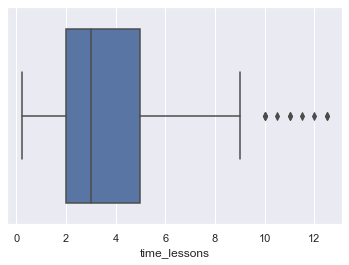

In [33]:
sns.boxplot(df_no_mv['time_lessons'])

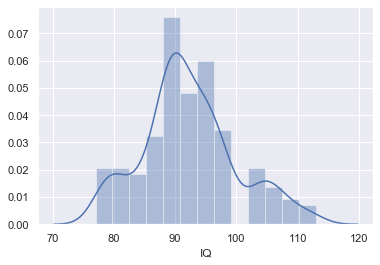

In [34]:
sns.distplot(df_no_mv['IQ'])

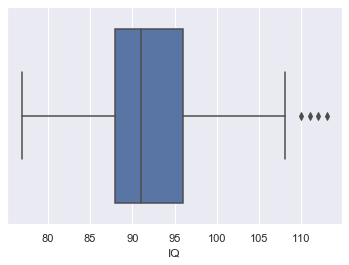

In [35]:
sns.boxplot(df_no_mv['IQ'])

In [36]:
# Now let's see lmplot graph according to dummy variable

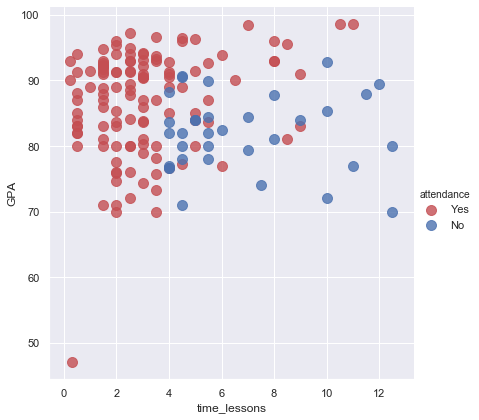

In [37]:
sns.lmplot(data=df_no_mv,x='time_lessons',y='GPA',fit_reg=False,hue='attendance',size=6,scatter_kws={"s":100},
          palette=dict(Yes="r",No="b"))

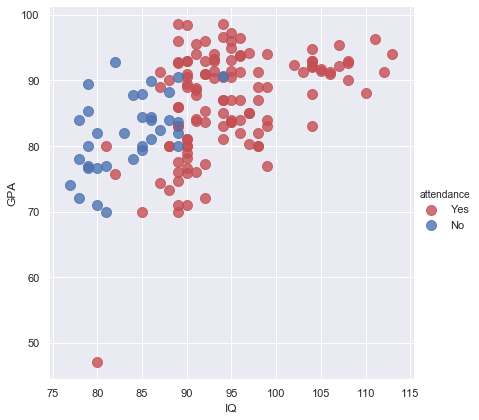

In [38]:
sns.lmplot(data=df_no_mv,x='IQ',y='GPA',fit_reg=False,hue='attendance',size=6,scatter_kws={"s":100},
           palette=dict(Yes="r",No="b"))

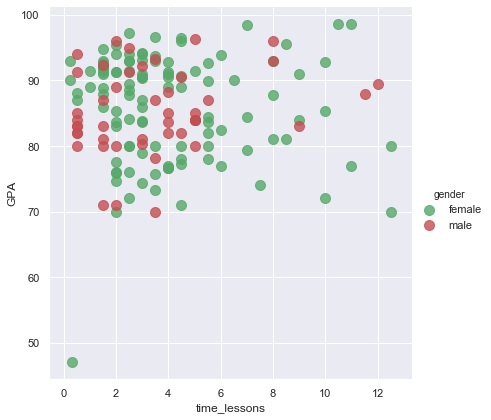

In [39]:
sns.lmplot(data=df_no_mv,x='time_lessons',y='GPA',fit_reg=False,hue='gender',size=6,scatter_kws={"s":100},
          palette=dict(female="g",male="r"))

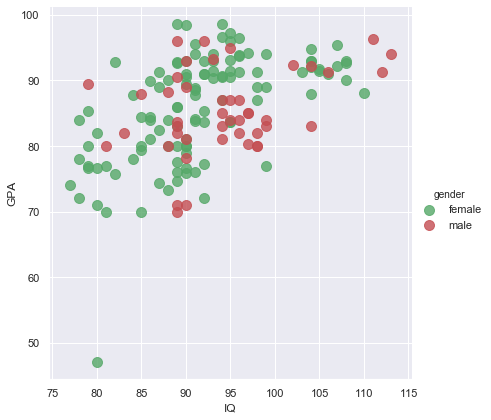

In [40]:
sns.lmplot(data=df_no_mv,x='IQ',y='GPA',fit_reg=False,hue='gender',size=6,scatter_kws={"s":100},
          palette=dict(female="g",male="r"))

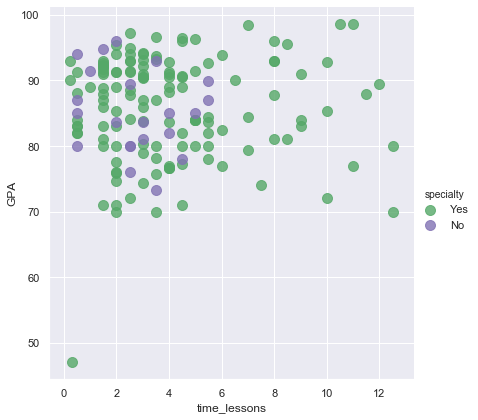

In [41]:
sns.lmplot(data=df_no_mv,x='time_lessons',y='GPA',fit_reg=False,hue='specialty',size=6,scatter_kws={"s":100},
          palette=dict(Yes="g",No="m"))

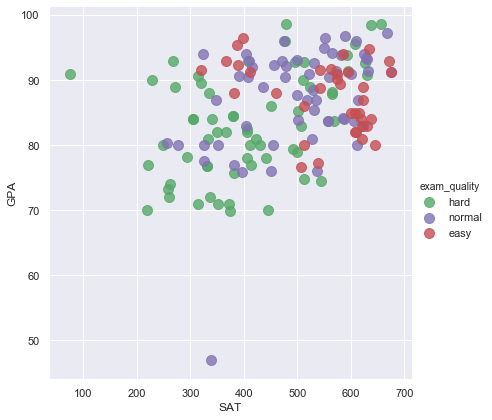

In [42]:
sns.lmplot(data=df_no_mv,x='SAT',y='GPA',fit_reg=False,hue='exam_quality',size=6,scatter_kws={"s":100},
          palette=dict(hard="g",easy="r",normal="m"))

### Dealing with outliers

In [43]:
a=df_no_mv['time_socialmedia'].quantile(0.99)
a

10.0

In [44]:
len(df_no_mv[df_no_mv['time_socialmedia']>a])

0

In [45]:
b=df_no_mv['time_lessons'].quantile(0.99)
b

12.219999999999999

In [46]:
len(df_no_mv[df_no_mv['time_lessons']>b])

2

In [47]:
c=df_no_mv['IQ'].quantile(0.99)
c

111.44

In [48]:
len(df_no_mv[df_no_mv['IQ']>c])

2

In [49]:
# Actually this data has outliers but there is no need to remove them. Because these outliers are not
# so huge values. That's why it is more advisable not to remove them

In [50]:
df_no_mv

,gender,time_socialmedia,time_lessons,GPA,SAT,parttime_job,specialty,IQ,health_problem,eng_level,attendance,exam_quality
0,female,5.0,4.0,90.60,314.0,No,Yes,95,No,A2,Yes,hard
1,female,7.0,7.0,84.50,379.7,No,Yes,85,No,A2,No,hard
3,male,6.0,2.0,80.00,325.0,No,Yes,81,No,A2,Yes,normal
4,female,3.0,7.0,98.50,637.5,No,Yes,90,No,B1,Yes,hard
5,female,4.0,2.0,91.26,412.0,No,Yes,103,No,B2,Yes,easy
...,...,...,...,...,...,...,...,...,...,...,...,...
157,female,2.0,1.5,92.27,456.0,No,Yes,107,No,B2,Yes,normal
158,female,7.0,10.0,72.00,337.0,Yes,Yes,78,No,A1,No,hard
159,female,7.5,2.0,74.73,512.0,Yes,Yes,89,Yes,A2,Yes,hard
160,female,4.0,3.0,83.87,501.0,No,Yes,91,No,B1,Yes,normal


In [51]:
# Because of removing missing values, indexing is not true. We should index the data

In [52]:
df_cleaned=df_no_mv.reset_index(drop=True)

In [53]:
df_cleaned

,gender,time_socialmedia,time_lessons,GPA,SAT,parttime_job,specialty,IQ,health_problem,eng_level,attendance,exam_quality
0,female,5.0,4.0,90.60,314.0,No,Yes,95,No,A2,Yes,hard
1,female,7.0,7.0,84.50,379.7,No,Yes,85,No,A2,No,hard
2,male,6.0,2.0,80.00,325.0,No,Yes,81,No,A2,Yes,normal
3,female,3.0,7.0,98.50,637.5,No,Yes,90,No,B1,Yes,hard
4,female,4.0,2.0,91.26,412.0,No,Yes,103,No,B2,Yes,easy
...,...,...,...,...,...,...,...,...,...,...,...,...
152,female,2.0,1.5,92.27,456.0,No,Yes,107,No,B2,Yes,normal
153,female,7.0,10.0,72.00,337.0,Yes,Yes,78,No,A1,No,hard
154,female,7.5,2.0,74.73,512.0,Yes,Yes,89,Yes,A2,Yes,hard
155,female,4.0,3.0,83.87,501.0,No,Yes,91,No,B1,Yes,normal


In [54]:
df_cleaned.describe(include='all')

,gender,time_socialmedia,time_lessons,GPA,SAT,parttime_job,specialty,IQ,health_problem,eng_level,attendance,exam_quality
count,157,157.000000,157.000000,157.000000,157.000000,157,157,157.000000,157,157,157,157
unique,2,NaN,NaN,NaN,NaN,2,2,NaN,2,5,2,3
top,female,NaN,NaN,NaN,NaN,No,Yes,NaN,No,B1,Yes,hard
freq,112,NaN,NaN,NaN,NaN,103,135,NaN,133,58,123,63
mean,NaN,4.119745,3.919108,85.734076,475.184713,NaN,NaN,92.286624,NaN,NaN,NaN,NaN
std,NaN,2.419722,2.785652,7.771917,124.274615,NaN,NaN,7.725292,NaN,NaN,NaN,NaN
min,NaN,1.000000,0.250000,47.000000,76.000000,NaN,NaN,77.000000,NaN,NaN,NaN,NaN
25%,NaN,2.000000,2.000000,80.000000,381.000000,NaN,NaN,88.000000,NaN,NaN,NaN,NaN
50%,NaN,3.500000,3.000000,87.000000,499.000000,NaN,NaN,91.000000,NaN,NaN,NaN,NaN
75%,NaN,5.000000,5.000000,91.500000,585.000000,NaN,NaN,96.000000,NaN,NaN,NaN,NaN


## Checking OLS assumptions

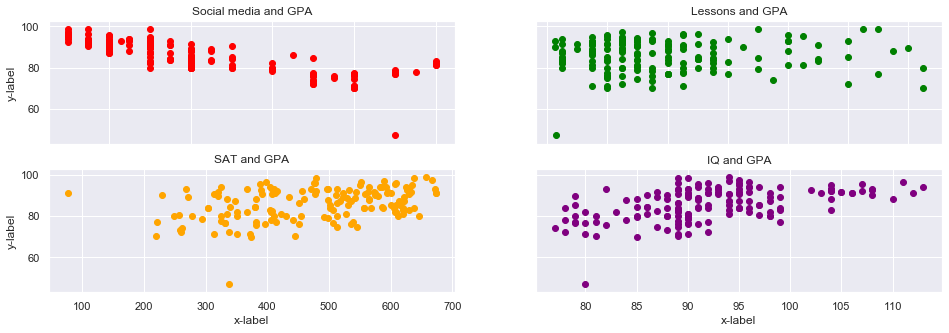

In [55]:
f,axs=plt.subplots(2,2,sharey=True,figsize=(16,5))
axs[0,0].scatter(df_cleaned['time_socialmedia'],df_cleaned['GPA'],color='red')
axs[0,0].set_title("Social media and GPA")
axs[0,1].scatter(df_cleaned['time_lessons'],df_cleaned['GPA'],color='green')
axs[0,1].set_title("Lessons and GPA")
axs[1,0].scatter(df_cleaned['SAT'],df_cleaned['GPA'],color='orange')
axs[1,0].set_title("SAT and GPA")
axs[1,1].scatter(df_cleaned['IQ'],df_cleaned['GPA'],color='purple')
axs[1,1].set_title("IQ and GPA")

for ax in axs.flat:
    ax.set(xlabel="x-label",ylabel="y-label")
    
for ax in axs.flat:
    ax.label_outer()

In [56]:
# As can be seen from the graph, almost all models are linear models

## Multicollinearity

In [57]:
df_cleaned.columns.values

array(['gender', 'time_socialmedia', 'time_lessons', 'GPA', 'SAT',
       'parttime_job', 'specialty', 'IQ', 'health_problem', 'eng_level',
       'attendance', 'exam_quality'], dtype=object)

In [58]:
variables=df_cleaned[['time_socialmedia','time_lessons','SAT','IQ']]

In [59]:
vif=pd.DataFrame()

In [60]:
variables.shape

(157, 4)

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]

In [63]:
vif["Variables"]=variables.columns

In [64]:
vif

,VIF,Variables
0,3.672376,time_socialmedia
1,2.760973,time_lessons
2,20.384183,SAT
3,27.953198,IQ


In [65]:
# "SAT" and "IQ" have the highest VIF, we should  remove them from the model
# They will drive the VIF of other variables down

In [66]:
df_no_multi=df_cleaned.drop(['SAT','IQ'],axis=1)

In [67]:
df_no_multi

,gender,time_socialmedia,time_lessons,GPA,parttime_job,specialty,health_problem,eng_level,attendance,exam_quality
0,female,5.0,4.0,90.60,No,Yes,No,A2,Yes,hard
1,female,7.0,7.0,84.50,No,Yes,No,A2,No,hard
2,male,6.0,2.0,80.00,No,Yes,No,A2,Yes,normal
3,female,3.0,7.0,98.50,No,Yes,No,B1,Yes,hard
4,female,4.0,2.0,91.26,No,Yes,No,B2,Yes,easy
...,...,...,...,...,...,...,...,...,...,...
152,female,2.0,1.5,92.27,No,Yes,No,B2,Yes,normal
153,female,7.0,10.0,72.00,Yes,Yes,No,A1,No,hard
154,female,7.5,2.0,74.73,Yes,Yes,Yes,A2,Yes,hard
155,female,4.0,3.0,83.87,No,Yes,No,B1,Yes,normal


## Dummy variables

In [68]:
df_dummy=pd.get_dummies(df_no_multi,drop_first=True)

In [70]:
df_dummy

,time_socialmedia,time_lessons,GPA,gender_male,parttime_job_Yes,specialty_Yes,health_problem_Yes,eng_level_A2,eng_level_B1,eng_level_B2,eng_level_C1,attendance_Yes,exam_quality_hard,exam_quality_normal
0,5.0,4.0,90.60,0,0,1,0,1,0,0,0,1,1,0
1,7.0,7.0,84.50,0,0,1,0,1,0,0,0,0,1,0
2,6.0,2.0,80.00,1,0,1,0,1,0,0,0,1,0,1
3,3.0,7.0,98.50,0,0,1,0,0,1,0,0,1,1,0
4,4.0,2.0,91.26,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2.0,1.5,92.27,0,0,1,0,0,0,1,0,1,0,1
153,7.0,10.0,72.00,0,1,1,0,0,0,0,0,0,1,0
154,7.5,2.0,74.73,0,1,1,1,1,0,0,0,1,1,0
155,4.0,3.0,83.87,0,0,1,0,0,1,0,0,1,0,1


## Rearrange columns

In [71]:
df_dummy.columns.values

array(['time_socialmedia', 'time_lessons', 'GPA', 'gender_male',
       'parttime_job_Yes', 'specialty_Yes', 'health_problem_Yes',
       'eng_level_A2', 'eng_level_B1', 'eng_level_B2', 'eng_level_C1',
       'attendance_Yes', 'exam_quality_hard', 'exam_quality_normal'],
      dtype=object)

In [74]:
columns=['gender_male','time_socialmedia','time_lessons','GPA','parttime_job_Yes','specialty_Yes',
         'health_problem_Yes','eng_level_A2', 'eng_level_B1','eng_level_B2', 'eng_level_C1', 'attendance_Yes',
         'exam_quality_hard', 'exam_quality_normal']

In [75]:
df_preprocessed=df_dummy[columns]

In [76]:
df_preprocessed

,gender_male,time_socialmedia,time_lessons,GPA,parttime_job_Yes,specialty_Yes,health_problem_Yes,eng_level_A2,eng_level_B1,eng_level_B2,eng_level_C1,attendance_Yes,exam_quality_hard,exam_quality_normal
0,0,5.0,4.0,90.60,0,1,0,1,0,0,0,1,1,0
1,0,7.0,7.0,84.50,0,1,0,1,0,0,0,0,1,0
2,1,6.0,2.0,80.00,0,1,0,1,0,0,0,1,0,1
3,0,3.0,7.0,98.50,0,1,0,0,1,0,0,1,1,0
4,0,4.0,2.0,91.26,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0,2.0,1.5,92.27,0,1,0,0,0,1,0,1,0,1
153,0,7.0,10.0,72.00,1,1,0,0,0,0,0,0,1,0
154,0,7.5,2.0,74.73,1,1,1,1,0,0,0,1,1,0
155,0,4.0,3.0,83.87,0,1,0,0,1,0,0,1,0,1


## Linear regression model

### Identifying the dependent and the independent variables

In [77]:
y=df_preprocessed['GPA']
x=df_preprocessed.drop(['GPA'],axis=1)

In [78]:
x

,gender_male,time_socialmedia,time_lessons,parttime_job_Yes,specialty_Yes,health_problem_Yes,eng_level_A2,eng_level_B1,eng_level_B2,eng_level_C1,attendance_Yes,exam_quality_hard,exam_quality_normal
0,0,5.0,4.0,0,1,0,1,0,0,0,1,1,0
1,0,7.0,7.0,0,1,0,1,0,0,0,0,1,0
2,1,6.0,2.0,0,1,0,1,0,0,0,1,0,1
3,0,3.0,7.0,0,1,0,0,1,0,0,1,1,0
4,0,4.0,2.0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0,2.0,1.5,0,1,0,0,0,1,0,1,0,1
153,0,7.0,10.0,1,1,0,0,0,0,0,0,1,0
154,0,7.5,2.0,1,1,1,1,0,0,0,1,1,0
155,0,4.0,3.0,0,1,0,0,1,0,0,1,0,1


In [79]:
y

0      90.60
1      84.50
2      80.00
3      98.50
4      91.26
       ...  
152    92.27
153    72.00
154    74.73
155    83.87
156    96.70
Name: GPA, Length: 157, dtype: float64

### P-values

In [80]:
x1=sm.add_constant(x)
output=sm.OLS(y,x1).fit()
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     29.78
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           2.64e-34
Time:                        16:34:38   Log-Likelihood:                -441.35
No. Observations:                 157   AIC:                             910.7
Df Residuals:                     143   BIC:                             953.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  90.8227      2.799     32.451      0.000      85.290      96.355
gender_male            -2.4737      0.780     -3.172      0.002      -4.015      -0.932
time_socialmedia       -2.1688      0.299     -7.263      0.000      -2.759      -1.579
time_lessons            0.3793      0.176      2.155      0.033       0.031       0.727
parttime_job_Yes       -2.2950      0.915     -2.509      0.013      -4.103      -0.487
specialty_Yes           0.4327      1.042      0.415      0.678      -1.626       2.492
health_problem_Yes      0.0277      1.284      0.022      0.983      -2.510       2.566
eng_level_A2           -0.1792      1.339     -0.134      0.894      -2.825       2.467
eng_level_B1            1.2168      1.683      0.723      0.471      -2.110       4.544
eng_level_B2            2.4714      2.070      1.194      0.235      -1.621       6.564
eng_level_C1            4.0480      3.160      1.281      0.202      -2.198      10.294
attendance_Yes          2.9477      1.221      2.414      0.017       0.534       5.361
exam_quality_hard       0.9939      1.289      0.771      0.442      -1.554       3.542
exam_quality_normal    -0.7550      0.986     -0.766      0.445      -2.704       1.194
==============================================================================
Omnibus:                       62.809   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              480.879
Skew:                          -1.197   Prob(JB):                    3.79e-105
Kurtosis:                      11.233   Cond. No.                         86.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# According to p-values, 'Specialty','Health problem','English level','Exam quality' must be removed.
# Because p-values of these variables are insignificant

In [85]:
X=df_preprocessed.drop(['specialty_Yes','health_problem_Yes','eng_level_A2','eng_level_B1','eng_level_B2',
                        'eng_level_C1','exam_quality_hard','exam_quality_normal','GPA'],axis=1)

In [86]:
X

,gender_male,time_socialmedia,time_lessons,parttime_job_Yes,attendance_Yes
0,0,5.0,4.0,0,1
1,0,7.0,7.0,0,0
2,1,6.0,2.0,0,1
3,0,3.0,7.0,0,1
4,0,4.0,2.0,0,1
...,...,...,...,...,...
152,0,2.0,1.5,0,1
153,0,7.0,10.0,1,0
154,0,7.5,2.0,1,1
155,0,4.0,3.0,0,1


### Scaling the data

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler=StandardScaler()

In [89]:
x_scaled=scaler.fit_transform(X)

In [90]:
x_scaled

array([[-0.63386569,  0.36494749,  0.02913163, -0.72406619,  0.52575923],
       [-0.63386569,  1.19413353,  1.10952504, -0.72406619, -1.90201132],
       [ 1.57762128,  0.77954051, -0.69113065, -0.72406619,  0.52575923],
       [-0.63386569, -0.46423856,  1.10952504, -0.72406619,  0.52575923],
       [-0.63386569, -0.04964553, -0.69113065, -0.72406619,  0.52575923],
       [-0.63386569,  0.77954051, -0.51106508,  1.38108921,  0.52575923],
       [-0.63386569,  0.98683702, -0.33099951, -0.72406619,  0.52575923],
       [-0.63386569,  1.60872655,  0.20919719,  1.38108921, -1.90201132],
       [ 1.57762128,  0.77954051,  0.20919719,  1.38108921, -1.90201132],
       [-0.63386569,  0.36494749, -0.69113065, -0.72406619,  0.52575923],
       [-0.63386569, -0.87883158,  1.64972174, -0.72406619,  0.52575923],
       [ 1.57762128, -0.87883158, -0.87119621, -0.72406619,  0.52575923],
       [-0.63386569,  1.19413353, -0.51106508,  1.38108921,  0.52575923],
       [-0.63386569,  0.36494749,  0.5

## Train and Test split

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=1)

## Regression model

### Train split

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
regressor=LinearRegression()

In [95]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
y_hat=regressor.predict(x_train)

In [97]:
y_hat

array([78.02157133, 85.31579119, 84.42213913, 71.25732244, 85.59553871,
       74.0883489 , 83.10808182, 92.31433691, 89.67767514, 75.35986128,
       88.89097392, 90.92936689, 94.32552978, 91.1347178 , 91.41359628,
       88.81006688, 97.81980548, 79.15922366, 72.9301774 , 91.6709083 ,
       87.73768587, 90.4549638 , 87.30873346, 76.72733465, 84.08421096,
       85.95921979, 86.36241929, 81.17779599, 78.02157133, 89.46348982,
       77.80709513, 86.9606881 , 90.02601139, 96.56840461, 81.38256875,
       84.82389144, 82.98201498, 86.52174136, 84.14500648, 89.24872273,
       88.92078889, 71.58554717, 86.73883243, 91.74182101, 91.88538451,
       89.59705899, 84.88683878, 92.70783296, 74.16925594, 78.31695457,
       94.67357514, 84.27886653, 90.24048759, 75.37520611, 90.02601139,
       77.80709513, 92.31433691, 94.60266243, 86.3169686 , 76.59115062,
       91.09839241, 85.66383655, 91.6709083 , 92.31433691, 70.22039778,
       89.67796603, 89.38258278, 87.19498494, 91.6709083 , 88.30

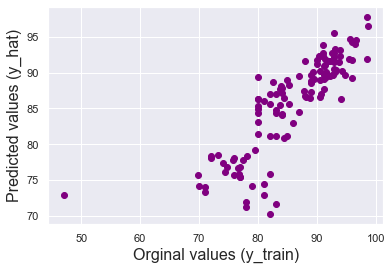

In [98]:
plt.scatter(y_train,y_hat,color="purple")
plt.xlabel("Orginal values (y_train)",size=16)
plt.ylabel("Predicted values (y_hat)",size=16)
plt.show()

Text(0.5, 1.0, 'Residuals graph')

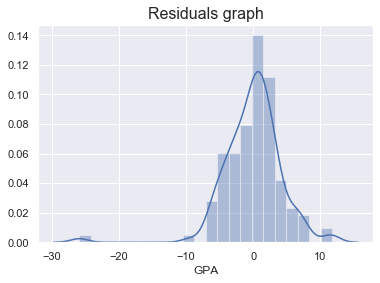

In [99]:
sns.distplot(y_train-y_hat)
plt.title("Residuals graph",size=16)

In [100]:
# R-squarred value
regressor.score(x_train,y_train)

0.7043029098664133

### Intercept and coefficients

In [101]:
regressor.intercept_

85.78337016897684

In [102]:
regressor.coef_

array([-0.99816029, -5.00213272,  1.19110058, -1.76188551,  1.18070582])

In [103]:
reg_table=pd.DataFrame(X.columns.values, columns=["Columns"])
reg_table["Coefficients"]=regressor.coef_

In [104]:
reg_table

,Columns,Coefficients
0,gender_male,-0.998160
1,time_socialmedia,-5.002133
2,time_lessons,1.191101
3,parttime_job_Yes,-1.761886
4,attendance_Yes,1.180706


In [105]:
# According to coefficients, Variables with negative coefficients have lower GPA than positive coefficients.
# For example, we can say that male students have 0.998160 units lower GPA than female students

### Test split

In [106]:
y_hat_test=regressor.predict(x_test)

In [107]:
y_hat_test

array([82.67912941, 85.94358407, 89.32962977, 86.81712461, 76.80562682,
       90.24048759, 77.41359908, 73.72466781, 94.17371003, 88.25724876,
       73.52582733, 90.02601139, 77.37076326, 88.47172496, 88.46259967,
       80.09542065, 84.55861405, 92.56426947, 87.52320967, 88.24754532,
       85.37106818, 93.95923383, 85.95921979, 90.07117119, 87.95216207,
       87.95216207, 88.4463858 , 82.34828981, 85.92376344, 89.63251534,
       88.20209463, 87.47025666])

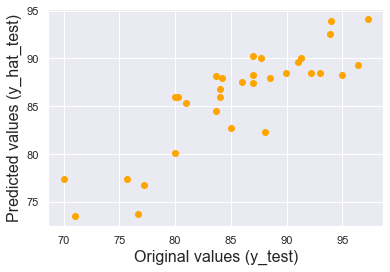

In [108]:
plt.scatter(y_test,y_hat_test,color="orange")
plt.xlabel("Original values (y_test)",size=16)
plt.ylabel("Predicted values (y_hat_test)",size=16)
plt.show()

In [109]:
df_predictions=pd.DataFrame(y_hat_test,columns=["Predictions"])
df_predictions.head(10)

,Predictions
0,82.679129
1,85.943584
2,89.329630
3,86.817125
4,76.805627
5,90.240488
6,77.413599
7,73.724668
8,94.173710
9,88.257249


In [110]:
df_predictions["Original values"]=y_test

In [111]:
df_predictions

,Predictions,Original values
0,82.679129,NaN
1,85.943584,NaN
2,89.329630,NaN
3,86.817125,NaN
4,76.805627,NaN
5,90.240488,80.0
6,77.413599,NaN
7,73.724668,NaN
8,94.173710,NaN
9,88.257249,NaN


In [112]:
# We see that there are many missing values. That means indexing is not true. We should index

In [113]:
y_test=y_test.reset_index(drop=True)
df_predictions["Original values"]=y_test
df_predictions

,Predictions,Original values
0,82.679129,85.00
1,85.943584,80.00
2,89.329630,96.40
3,86.817125,84.00
4,76.805627,77.20
5,90.240488,87.00
6,77.413599,75.70
7,73.724668,76.71
8,94.173710,97.30
9,88.257249,95.00


In [114]:
df_predictions["Residuals"]=df_predictions["Original values"]-df_predictions["Predictions"]

In [115]:
df_predictions["Difference_%"]=np.absolute(df_predictions["Residuals"]/df_predictions["Original values"]*100)

In [116]:
df_predictions.head(10)

,Predictions,Original values,Residuals,Difference_%
0,82.679129,85.00,2.320871,2.730436
1,85.943584,80.00,-5.943584,7.429480
2,89.329630,96.40,7.070370,7.334409
3,86.817125,84.00,-2.817125,3.353720
4,76.805627,77.20,0.394373,0.510846
5,90.240488,87.00,-3.240488,3.724698
6,77.413599,75.70,-1.713599,2.263671
7,73.724668,76.71,2.985332,3.891712
8,94.173710,97.30,3.126290,3.213042
9,88.257249,95.00,6.742751,7.097633


In [117]:
df_predictions.describe()

,Predictions,Original values,Residuals,Difference_%
count,32.000000,32.000000,32.000000,32.000000
mean,85.922472,85.680625,-0.241847,3.435313
std,5.372435,6.994931,3.635634,2.584268
min,73.525827,70.000000,-7.370763,0.043368
25%,84.088743,80.825000,-2.598652,1.431096
50%,87.737686,86.500000,-0.282839,2.971739
75%,88.686201,91.082500,1.737928,5.008289
max,94.173710,97.300000,7.070370,10.529662


In [118]:
pd.options.display.max_rows = 1000
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_predictions.sort_values(by=['Difference_%'])

,Predictions,Original values,Residuals,Difference_%
21,93.96,94.00,0.04,0.04
15,80.10,80.00,-0.10,0.12
4,76.81,77.20,0.39,0.51
31,87.47,87.00,-0.47,0.54
25,87.95,88.51,0.56,0.63
16,84.56,83.63,-0.93,1.11
23,90.07,91.33,1.26,1.38
17,92.56,93.90,1.34,1.42
19,88.25,87.00,-1.25,1.43
29,89.63,91.00,1.37,1.50


## Result

In [119]:
pd.options.display.max_rows = 1000
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_predictions.sort_values(by=['Difference_%'])

,Predictions,Original values,Residuals,Difference_%
21,93.96,94.00,0.04,0.04
15,80.10,80.00,-0.10,0.12
4,76.81,77.20,0.39,0.51
31,87.47,87.00,-0.47,0.54
25,87.95,88.51,0.56,0.63
16,84.56,83.63,-0.93,1.11
23,90.07,91.33,1.26,1.38
17,92.56,93.90,1.34,1.42
19,88.25,87.00,-1.25,1.43
29,89.63,91.00,1.37,1.50


In [120]:
X.head(10)

,gender_male,time_socialmedia,time_lessons,parttime_job_Yes,attendance_Yes
0,0,5.00,4.00,0,1
1,0,7.00,7.00,0,0
2,1,6.00,2.00,0,1
3,0,3.00,7.00,0,1
4,0,4.00,2.00,0,1
5,0,6.00,2.50,1,1
6,0,6.50,3.00,0,1
7,0,8.00,4.50,1,0
8,1,6.00,4.50,1,0
9,0,5.00,2.00,0,1


In [121]:
# Let's view any row for example

In [122]:
new_df=pd.DataFrame(data=[[1,5,4,0,1],[0,6,3.5,1,0]],columns=['gender','time_socialmedia','time_lessons','parttime_job',
                                                              'attendance'])

In [123]:
new_df

,gender,time_socialmedia,time_lessons,parttime_job,attendance
0,1,5,4.00,0,1
1,0,6,3.50,1,0


In [124]:
regressor.predict(new_df)

array([65.71965442, 58.17754037])

In [125]:
# So students with the above characteristics must have 65.72 and 58.18 GPA

In [126]:
# Now let's see second row

In [130]:
data_={'Gender': ['male'],
       'Time_socialmedia':[6],
       'Time_lessons':[2],
       'Parttime_job':['No'],
       'Attendance':['Yes'],
       'Original_GPA':[96.40],
       'Predicted_GPA':[89.33],
       'Residual':[7.23],
       'Difference':[7.49]}

In [131]:
df__=pd.DataFrame(data_)

In [132]:
df__

,Gender,Time_socialmedia,Time_lessons,Parttime_job,Attendance,Original_GPA,Predicted_GPA,Residual,Difference
0,male,6,2,No,Yes,96.40,89.33,7.23,7.49


In [ ]:
# We see that original GPA value is 96.40 according to all these features above. But actually this value should 89.33 
# So that student's grade is 7.23 units greater than normal value